<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/practica26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/LailaBulh/Programacion---Claas-Files/blob/main/practica26_2.ipynb

##  **1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**

Declarar las bibliotecas necesarias para este proyecto
Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,balanced_accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/TCGA_InfoWithGrade.csv')

## **2. 📊 Análisis exploratorio de datos (EDA)**

Realiza un análisis inicial de los datos antes de modelar:

Describir forma y estructura (shape, describe(), info()).

In [4]:
print(df.head())

print(df.info())

   Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0      0       0             51.30     0     1     0     0     0     0    0   
1      0       0             38.72     0     1     0     0     0     0    1   
2      0       0             35.17     0     1     1     1     0     0    0   
3      0       1             32.78     0     1     1     1     0     0    0   
4      0       0             31.51     0     1     1     1     0     0    0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       0     0     1       0  
4  ...      0    0       0     0      0        0       0     0     0       0  

[5 rows x 24 columns]
<class 'pandas.core.frame.Da

In [5]:
print('Numero de columnas y filas en el dataset: ', df.shape)

Numero de columnas y filas en el dataset:  (839, 24)


**Mostrar la distribución de clases (y.value_counts()).**




In [6]:
columns = ['IDH1','TP53','ATRX','PTEN','EGFR','CIC','MUC16','PIK3CA','NF1','PIK3R1','FUBP1','RB1','NOTCH1','BCOR','CSMD3','SMARCA4','GRIN2A','IDH2','FAT4','PDGFRA']

#for col in columns:
 # print('\n',df[col].value_counts())

counts = df[columns].sum()

print(counts)

IDH1       404
TP53       348
ATRX       217
PTEN       141
EGFR       112
CIC        111
MUC16       98
PIK3CA      73
NF1         67
PIK3R1      54
FUBP1       45
RB1         40
NOTCH1      38
BCOR        29
CSMD3       27
SMARCA4     27
GRIN2A      27
IDH2        23
FAT4        23
PDGFRA      22
dtype: int64


**Visualizaciones:**

 Barplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'IDH1'),
  Text(1, 0, 'TP53'),
  Text(2, 0, 'ATRX'),
  Text(3, 0, 'PTEN'),
  Text(4, 0, 'EGFR'),
  Text(5, 0, 'CIC'),
  Text(6, 0, 'MUC16'),
  Text(7, 0, 'PIK3CA'),
  Text(8, 0, 'NF1'),
  Text(9, 0, 'PIK3R1'),
  Text(10, 0, 'FUBP1'),
  Text(11, 0, 'RB1'),
  Text(12, 0, 'NOTCH1'),
  Text(13, 0, 'BCOR'),
  Text(14, 0, 'CSMD3'),
  Text(15, 0, 'SMARCA4'),
  Text(16, 0, 'GRIN2A'),
  Text(17, 0, 'IDH2'),
  Text(18, 0, 'FAT4'),
  Text(19, 0, 'PDGFRA')])

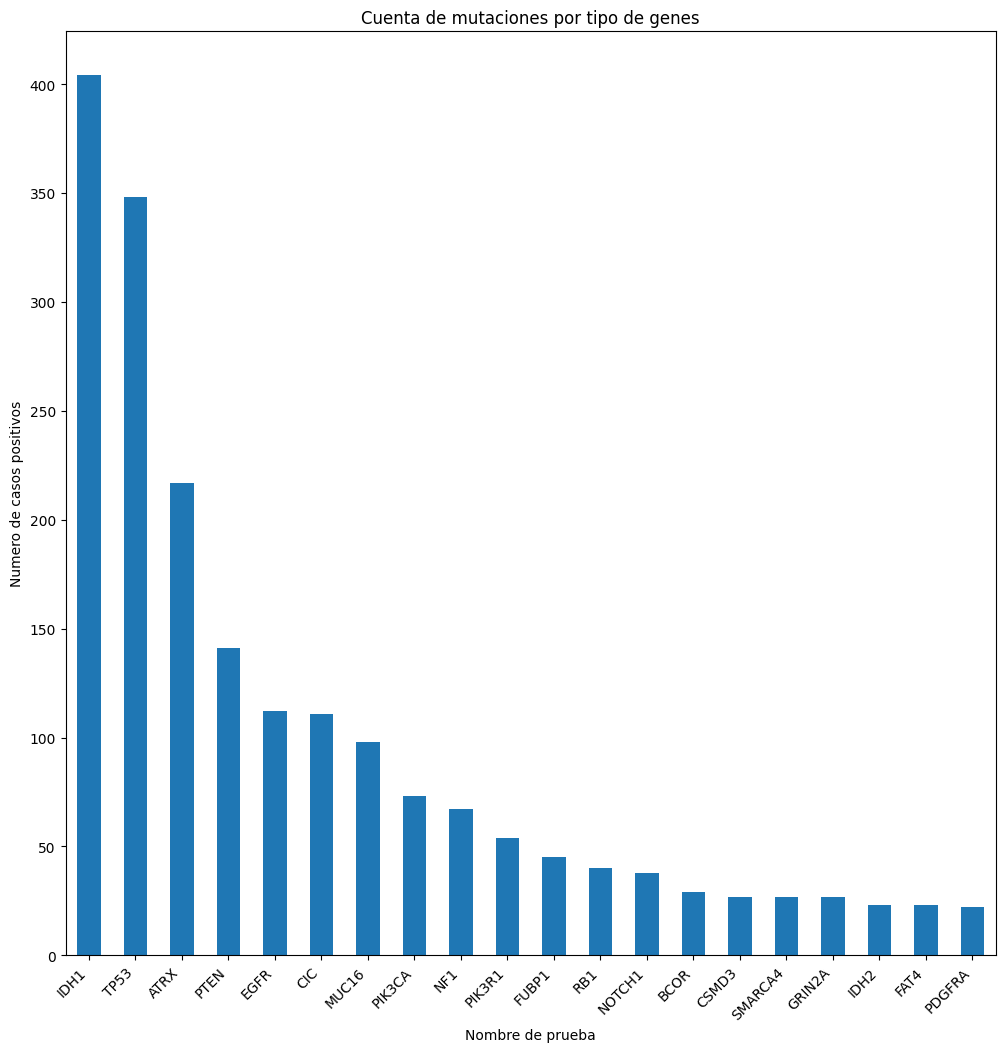

In [7]:
counts.plot(kind='bar', figsize=(12,12))
plt.title('Cuenta de mutaciones por tipo de genes')
plt.xlabel('Nombre de prueba')
plt.ylabel('Numero de casos positivos')
plt.xticks(rotation=45, ha='right')


Boxplots

In [8]:
import seaborn as sns

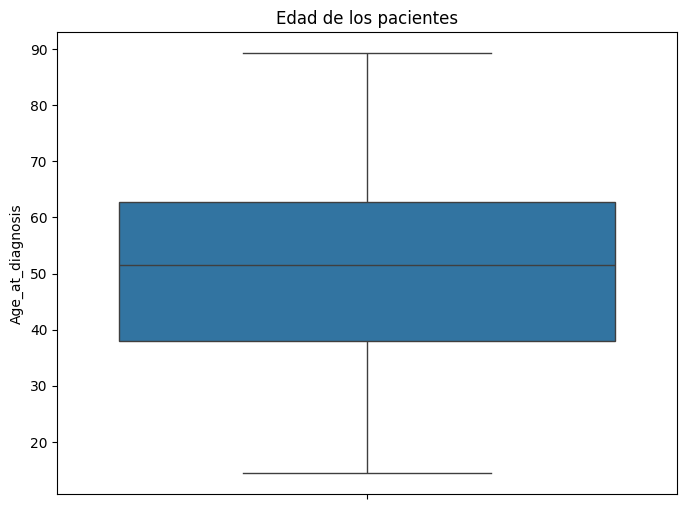

In [9]:
plt.figure(figsize= (8, 6))

sns.boxplot(data=df['Age_at_diagnosis'])
plt.title('Edad de los pacientes')
plt.show()


Mapa de calor de correlaciones entre variables.


<Axes: >

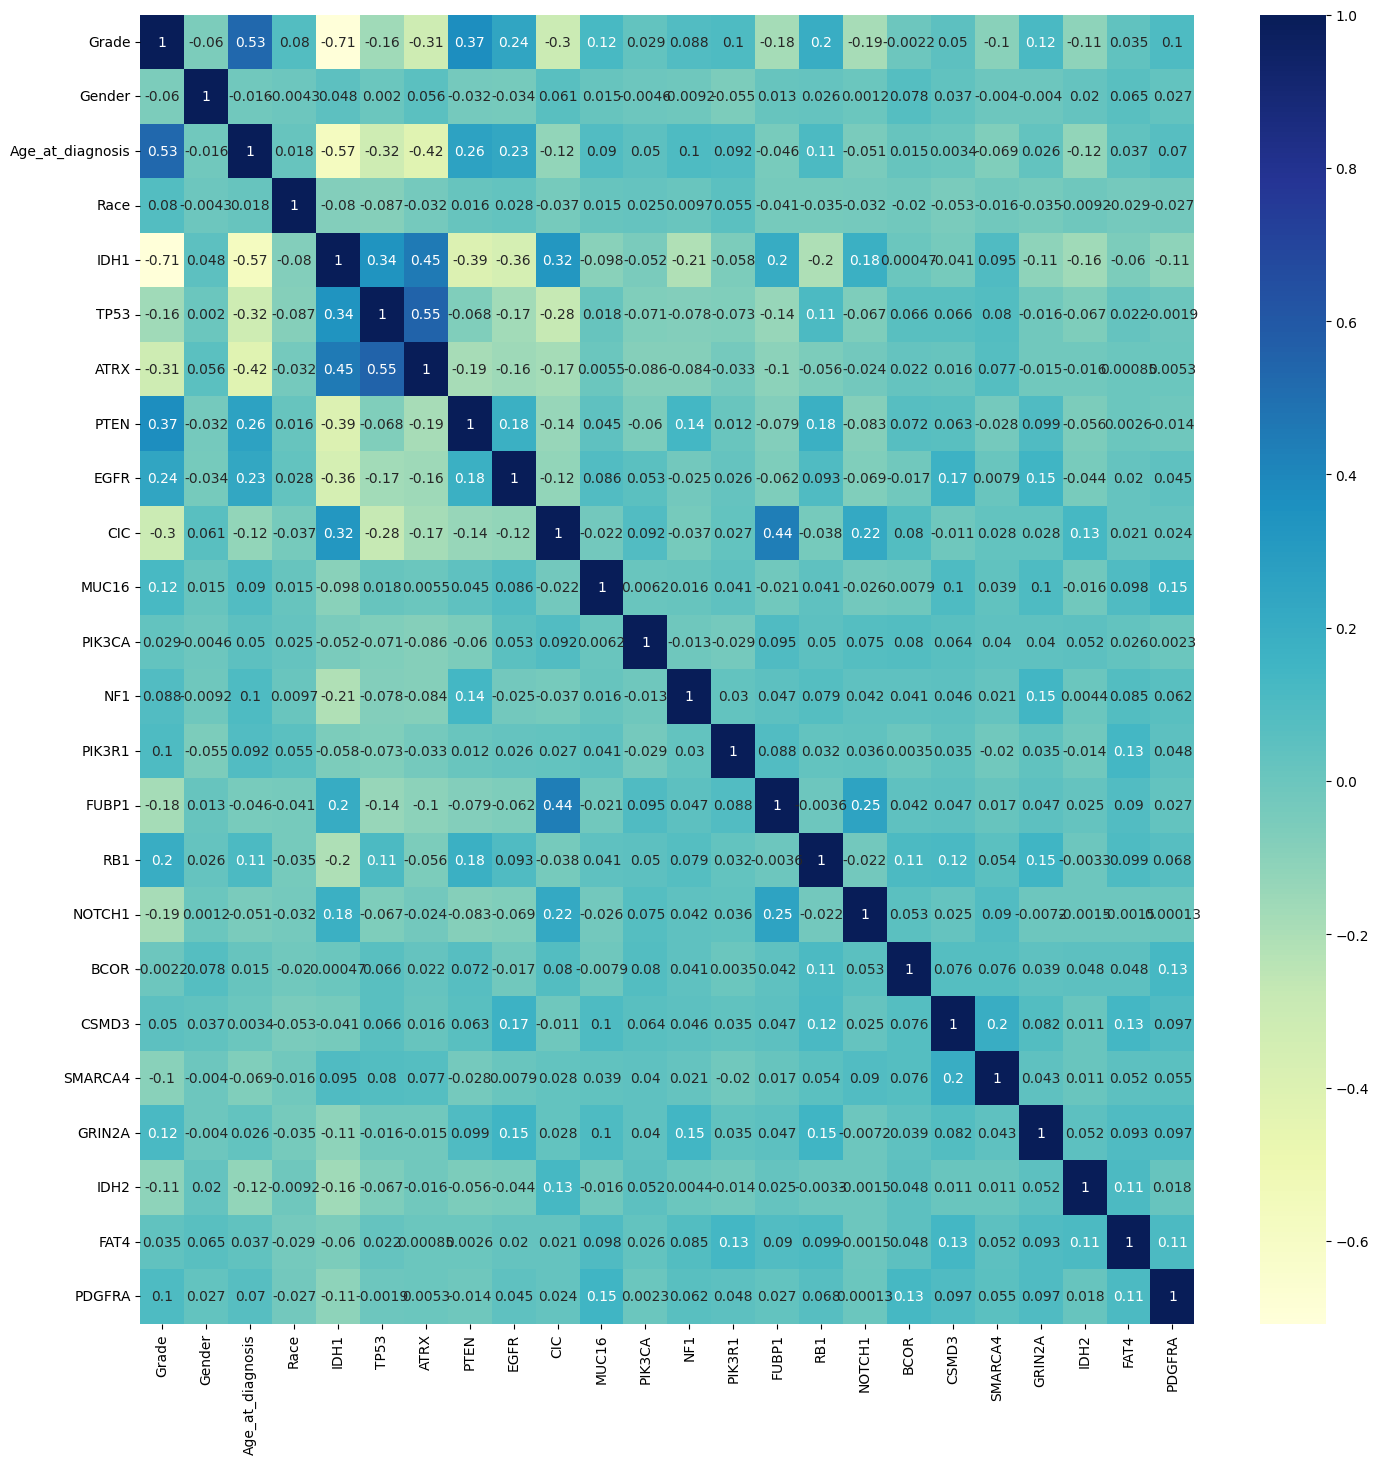

In [10]:
matriz_corr = df.corr()

#print(matriz_corr)

plt.figure(figsize=(17,17))
sns.heatmap(matriz_corr, annot= True, cmap='YlGnBu')

### 🧠 Reflexiona:

* ¿Existen clases desbalanceadas?

Si, analizando el gráfico de barras se aprecia que las pruebas de TP53 y IDH1 rondan los valores de 348 y 404 casos positivos respectivamente, mientras pruebas como IDH2, FAT4 y PDGFRA solo tienen aproximadamente 22 pruebas positivas, por esto el modelo podria ignorar datos de estas pruebas con menos casos positivos.


* ¿Qué atributos parecen más informativos?

La edad parece tener una relación fuerte con la columna grade que representa el tipo de glioma en el cerebro del paciente.

Los genes mutados no parecen tener gran relación con grade, pero la combinacion de ellos pudiera ayudar a un buen modelo de predicción.


## **3. Gráfica de Errores en Entrenamiento y Prueba**

En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

In [15]:
from pandas.plotting import scatter_matrix


In [13]:
### Variables predictoras

### Se utiliza la columna Grade como predictora porque es la salida del dataset
X = df.drop('Grade', axis= 1)
y = df['Grade']

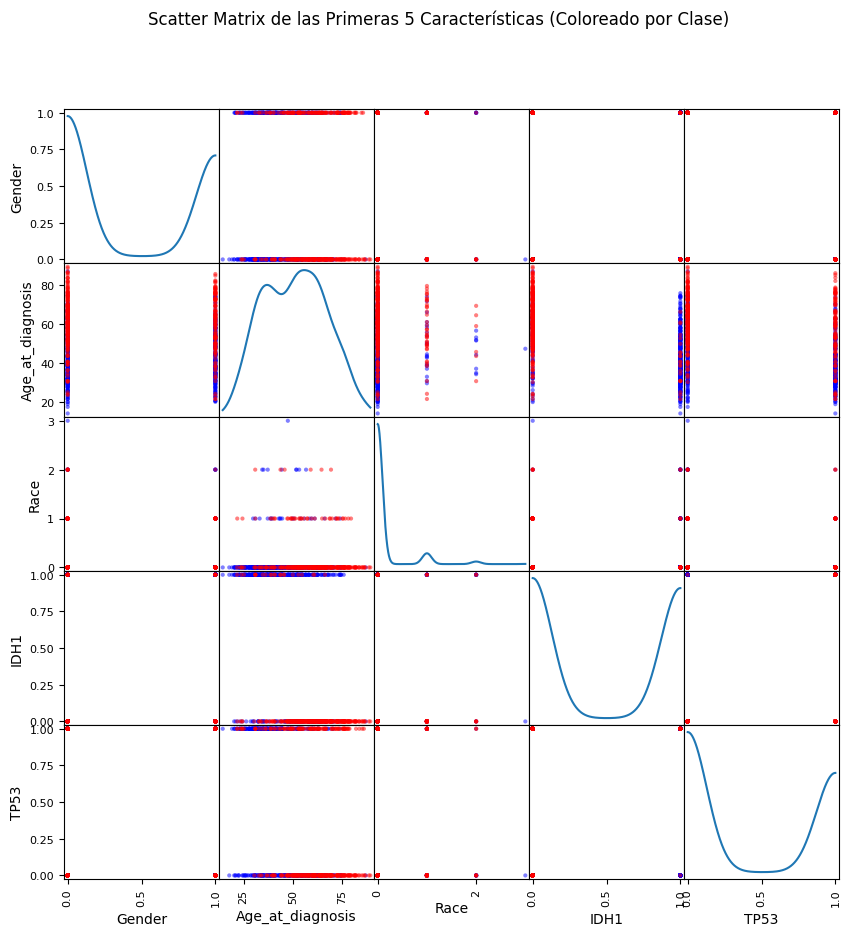

In [16]:
# Visualización adicional: scatter matrix coloreada por clase

colors = df['Grade'].map({0: 'blue', 1: 'red'})
scatter_matrix(X.iloc[:, :5], figsize=(10, 10), diagonal='kde', alpha=0.5, color=colors)
plt.suptitle("Scatter Matrix de las Primeras 5 Características (Coloreado por Clase)")
plt.show()


In [17]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
### División de datos, 70% entrenamiento, 30% prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

print('X_train:\n', X_train)
print('\nX_test:\n', X_test)
print('\ny_train:\n', y_train)
print('\ny_test:\n', y_test)



X_train:
      Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  MUC16  \
145       1             62.53     0     1     1     1     0     0    0      0   
309       1             52.17     0     1     0     0     0     0    1      0   
234       0             55.24     0     0     0     0     0     0    0      0   
220       0             44.25     0     1     0     0     0     0    0      0   
411       0             58.46     0     1     0     0     0     0    0      0   
..      ...               ...   ...   ...   ...   ...   ...   ...  ...    ...   
71        0             33.93     0     1     1     1     0     0    0      0   
106       0             41.21     0     1     1     1     0     0    0      0   
270       1             58.04     0     1     1     1     0     0    0      0   
435       1             48.21     0     1     0     0     0     0    1      0   
102       0             36.18     0     1     1     1     0     0    0      0   

     ...  FUBP1  

## Entrenar modelos con diferentes profundidades y evaluar su rendimiento

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, recall_score


In [36]:
train_accuracies = []
test_accuracies = []
depths = [2, 5, 10, 15, 20, 25, 30]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scorers = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'recall_0': make_scorer(recall_score, pos_label=0),
    'recall_1': make_scorer(recall_score, pos_label=1)
}


for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, clf.predict(X_test)))
    scores_tree = cross_validate(clf, X, y, scoring=scorers, cv=cv)

    print("\nEvaluación del Árbol de Decisión sin SMOTE (Stratified K-Fold)")
    print("Accuracy por fold:", scores_tree['test_accuracy'])
    print("Precision macro por fold:", scores_tree['test_precision_macro'])
    print("Recall macro por fold:", scores_tree['test_recall_macro'])
    print("Recall clase 0 por fold:", scores_tree['test_recall_0'])
    print("Recall clase 1 por fold:", scores_tree['test_recall_1'])
    print("F1 macro por fold:", scores_tree['test_f1_macro'])



Evaluación del Árbol de Decisión sin SMOTE (Stratified K-Fold)
Accuracy por fold: [0.86904762 0.88095238 0.86904762 0.8452381  0.94047619 0.79761905
 0.88095238 0.89285714 0.83333333 0.86746988]
Precision macro por fold: [0.86904762 0.87918321 0.87386364 0.84204545 0.9375     0.8083524
 0.87636573 0.89137833 0.83333333 0.87354312]
Recall macro por fold: [0.87959184 0.88979592 0.88367347 0.85102041 0.94081633 0.81428571
 0.88163265 0.89930556 0.84027778 0.88154762]
Recall clase 0 por fold: [0.81632653 0.83673469 0.79591837 0.81632653 0.93877551 0.71428571
 0.87755102 0.85416667 0.79166667 0.79166667]
Recall clase 1 por fold: [0.94285714 0.94285714 0.97142857 0.88571429 0.94285714 0.91428571
 0.88571429 0.94444444 0.88888889 0.97142857]
F1 macro por fold: [0.86813187 0.8798627  0.86858199 0.84344086 0.93901554 0.79736058
 0.87847222 0.89210789 0.83247863 0.86716136]

Evaluación del Árbol de Decisión sin SMOTE (Stratified K-Fold)
Accuracy por fold: [0.85714286 0.88095238 0.86904762 0.857

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_tree = cross_validate(clf, X, y, scoring=scorers, cv=cv)

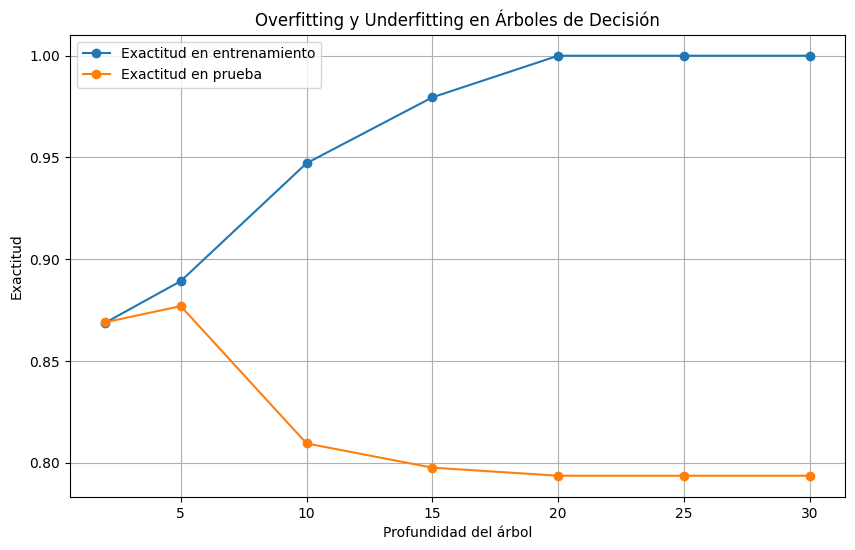

In [29]:
plt.figure(figsize=(10,6))
plt.plot(depths, train_accuracies, label='Exactitud en entrenamiento', marker='o')
plt.plot(depths, test_accuracies, label='Exactitud en prueba', marker='o')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')
plt.title('Overfitting y Underfitting en Árboles de Decisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### Test LC


clf = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_tree = cross_validate(clf, X, y, scoring=scorers, cv=cv)

